# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 8.0 MB/s eta 0:00:01    |███████▉                        | 5.4 MB 8.0 MB/s eta 0:00:03
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [3]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
accidents.head(2)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,is_non_functioning_device,has_no_controls,is_day,is_evening,is_morning,is_night,is_fall,is_spring,is_summer,is_winter
0,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,...,0,1,1,0,0,0,0,0,1,0
5,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
for idx, feature in enumerate(accidents.columns):
    print('{}. {}'.format(idx, feature))

0. RD_NO
1. CRASH_DATE
2. POSTED_SPEED_LIMIT
3. TRAFFIC_CONTROL_DEVICE
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. LIGHTING_CONDITION
7. FIRST_CRASH_TYPE
8. TRAFFICWAY_TYPE
9. LANE_CNT
10. ALIGNMENT
11. ROADWAY_SURFACE_COND
12. ROAD_DEFECT
13. CRASH_TYPE
14. INTERSECTION_RELATED_I
15. NOT_RIGHT_OF_WAY_I
16. HIT_AND_RUN_I
17. PRIM_CONTRIBUTORY_CAUSE
18. SEC_CONTRIBUTORY_CAUSE
19. STREET_NO
20. STREET_DIRECTION
21. STREET_NAME
22. BEAT_OF_OCCURRENCE
23. WORK_ZONE_I
24. WORK_ZONE_TYPE
25. WORKERS_PRESENT_I
26. INJURIES_UNKNOWN
27. CRASH_HOUR
28. CRASH_DAY_OF_WEEK
29. LATITUDE
30. LONGITUDE
31. LOCATION
32. crash_date
33. crash_year
34. crash_month
35. is_fatal_or_incap
36. time_of_day
37. is_weekend
38. season
39. is_cyclist
40. is_pedestrian
41. is_head_on
42. is_parked
43. is_using_cellphone
44. has_disregarded_traffic_devices
45. is_failed_to_yield_right_of_way
46. is_reckless_driving
47. is_sleet_snow
48. is_rain
49. is_clear_weather
50. has_snow_ice
51. is_dark_no_lighting
52. has_st

In [5]:
accidents.columns[31:]

Index(['LOCATION', 'crash_date', 'crash_year', 'crash_month',
       'is_fatal_or_incap', 'time_of_day', 'is_weekend', 'season',
       'is_cyclist', 'is_pedestrian', 'is_head_on', 'is_parked',
       'is_using_cellphone', 'has_disregarded_traffic_devices',
       'is_failed_to_yield_right_of_way', 'is_reckless_driving',
       'is_sleet_snow', 'is_rain', 'is_clear_weather', 'has_snow_ice',
       'is_dark_no_lighting', 'has_stop_sign_or_traffic_light',
       'is_intersection', 'is_non_functioning_device', 'has_no_controls',
       'is_day', 'is_evening', 'is_morning', 'is_night', 'is_fall',
       'is_spring', 'is_summer', 'is_winter'],
      dtype='object')

## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [22]:
indices = [2, 37] + list(range(39, 64))
selected_features = list(accidents.columns[indices])
selected_features

['POSTED_SPEED_LIMIT',
 'is_weekend',
 'is_cyclist',
 'is_pedestrian',
 'is_head_on',
 'is_parked',
 'is_using_cellphone',
 'has_disregarded_traffic_devices',
 'is_failed_to_yield_right_of_way',
 'is_reckless_driving',
 'is_sleet_snow',
 'is_rain',
 'is_clear_weather',
 'has_snow_ice',
 'is_dark_no_lighting',
 'has_stop_sign_or_traffic_light',
 'is_intersection',
 'is_non_functioning_device',
 'has_no_controls',
 'is_day',
 'is_evening',
 'is_morning',
 'is_night',
 'is_fall',
 'is_spring',
 'is_summer',
 'is_winter']

In [23]:
# X = accidents[['is_weekend',
#                'involved_cyclist',
#                'involved_pedestrian',
#                'was_head_on',
#                'was_parked',
#                'using_cellphone',
#                'disregarded_traffic_devices',
#                'failed_to_yield_right_of_way',
#                'reckless_driving',
#                'is_sleet_snow',
#                'is_rain',
#                'is_clear_weather',
#                'has_snow_ice',
#                'was_dark_no_lighting',
#                'at_stop_sign_or_traffic_light',
#                'at_intersection',
#                'was_non_functioning_device',
#                'is_day',
#                'is_evening',
#                'is_morning',
#                'is_night',
#                'is_fall', 
#                'is_spring',
#                'is_summer',
#                'is_winter']]

# y = accidents['is_fatal_or_incap']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [24]:
X = accidents[selected_features]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [25]:
# OVERSAMPLING

#oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
oversampler = SMOTE(sampling_strategy=0.75, random_state=3)
X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [26]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([0.0306245 , 0.00407487, 0.00653642, 0.0525866 , 0.        ,
       0.03786281, 0.        , 0.00033264, 0.        , 0.        ,
       0.00016093, 0.00155928, 0.03093522, 0.00435424, 0.00520634,
       0.01546157, 0.00018629, 0.        , 0.02180989, 0.01524437,
       0.00212204, 0.00169815, 0.00444348, 0.00403474, 0.00212356,
       0.0013751 , 0.0035345 ])

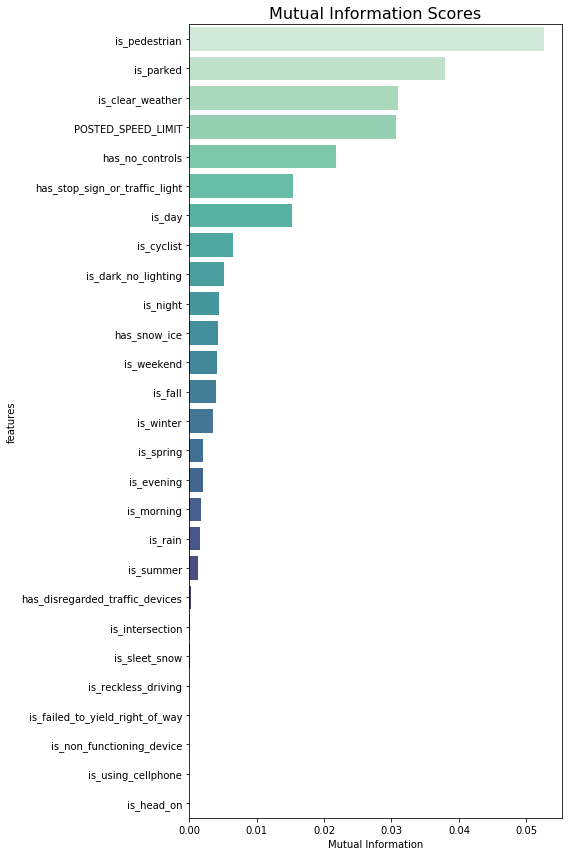

In [27]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)


fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(data=mi_df,x='mutual_info_score', y='features', palette='mako_r', ax=ax)
ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();

## Chi-Squared

Can only use categorical features.

In [16]:
indices = [37] + list(range(39, 64))
selected_features = list(accidents.columns[indices])
selected_features

['is_weekend',
 'is_cyclist',
 'is_pedestrian',
 'is_head_on',
 'is_parked',
 'is_using_cellphone',
 'has_disregarded_traffic_devices',
 'is_failed_to_yield_right_of_way',
 'is_reckless_driving',
 'is_sleet_snow',
 'is_rain',
 'is_clear_weather',
 'has_snow_ice',
 'is_dark_no_lighting',
 'has_stop_sign_or_traffic_light',
 'is_intersection',
 'is_non_functioning_device',
 'has_no_controls',
 'is_day',
 'is_evening',
 'is_morning',
 'is_night',
 'is_fall',
 'is_spring',
 'is_summer',
 'is_winter']

In [17]:
X = accidents[selected_features]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [18]:
# OVERSAMPLING
#oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
oversampler = SMOTE(sampling_strategy=0.5, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

In [19]:
# First array is comprised of the F-scores.
# Second array is comprised of the p-values.
f_score = chi2(X_over, y_over)
f_score

(array([1.49894471e-01, 6.31831804e+03, 3.70634093e+04, 8.53447633e+00,
        1.41298572e+04,            nan,            nan,            nan,
                   nan, 6.12841032e+02, 6.08090918e+02, 4.69717792e+00,
        1.68489878e+03, 1.88813955e+03, 2.61667123e+03, 2.87789674e+02,
                   nan, 2.06524442e+03, 8.91832713e+02, 8.02945889e+01,
        5.54858269e+00, 1.76891506e+03, 4.02402535e+01, 1.80700026e+01,
        5.89953513e+01, 1.12326530e+02]),
 array([6.98636226e-001, 0.00000000e+000, 0.00000000e+000, 3.48481578e-003,
        0.00000000e+000,             nan,             nan,             nan,
                    nan, 2.69662865e-135, 2.91057906e-134, 3.02121863e-002,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.50720613e-064,
                    nan, 0.00000000e+000, 5.85193789e-196, 3.22551158e-019,
        1.84956576e-002, 0.00000000e+000, 2.24572940e-010, 2.12929796e-005,
        1.58044907e-014, 3.03053275e-026]))

In [20]:
chi2_p_values = pd.DataFrame()
chi2_p_values['features'] = X_train.columns
chi2_p_values['p_value'] = f_score[1]
chi2_p_values['p_value'] = chi2_p_values['p_value'].apply(lambda x: np.round(x, decimals=4))
chi2_p_values.sort_values('p_value', ascending=True, axis=0, inplace=True)


chi2_p_values

,features,p_value
14,has_stop_sign_or_traffic_light,0.0000
23,is_spring,0.0000
22,is_fall,0.0000
21,is_night,0.0000
19,is_evening,0.0000
18,is_day,0.0000
17,has_no_controls,0.0000
15,is_intersection,0.0000
24,is_summer,0.0000
25,is_winter,0.0000
